In [1]:
import scipy.io
import numpy as np
from numpy import linalg as LA
import matplotlib
import time
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from functions import *
from numpy import random

In [2]:
# load data
mat = scipy.io.loadmat('face.mat')
raw_data = mat['X']

D,N = raw_data.shape

raw_data = np.transpose(raw_data)

partitioned_training_data = np.empty([4,int(520*0.8/4), 2576])

testing_data = np.empty([int(520*0.2), 2576])

# create training and test data
for x in range(52):
    for y in range(4):
        partitioned_training_data[y][x*2:(x+1)*2] = raw_data[x*10+(2*y):x*10+(2*(y+1))]
    testing_data[x*2:(x+1)*2] = raw_data[x*10+8:(x+1)*10]
    

raw_data = np.transpose(raw_data)
# partitioned_training_data = np.transpose(partitioned_training_data)
testing_data = np.transpose(testing_data)

Combine partition 0 and 1

In [3]:
ds0 = partitioned_training_data[0]
ds1 = partitioned_training_data[1]
ds2 = partitioned_training_data[2]
ds3 = partitioned_training_data[3]

normal pca took  0.018954038619995117  seconds.
(2576, 104)
(2576, 1)
(2576, 104)


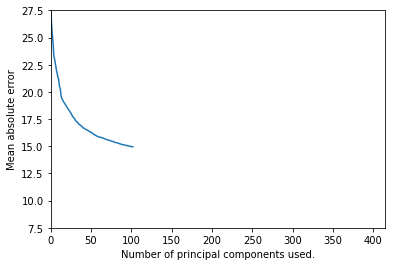

In [4]:
mface = ds0.mean(axis = 0)
_,u = normal_pca(ds0, mface)
faces = reconstruct(testing_data.T, mface.reshape(1,-1), u.T, 200)
mface = mface.reshape(-1,1)
print(testing_data.shape)
print(mface.shape)
print(u.shape)
plot_err(ds0, testing_data.T, mface.T, u.T, 0)

In [ ]:
plot_class_rate(ds0, testing_data.T, mface.T, u.T)

In [ ]:
# mface = ds0.T.mean(axis=0)
# _,u = lowdim_pca(ds0.T, mface) #bc dimension diff from q1, so need to use reversed
# print(testing_data.shape)
# print(mface.reshape(1,-1).shape)
# print(u.shape)
# faces = reconstruct(testing_data.T, mface, u.T, 200)
# # plot_class_rate(ds0, testing_data.T, mface.reshape(1,-1), u)





In [ ]:
combined_training, eigenface, new_mu, new_cov = merge_dataset(ds0, ds1)
combined_training, eigenface, new_mu, new_cov = merge_dataset(combined_training, ds2)
combined_training, eigenface, new_mu, new_cov = merge_dataset(combined_training, ds3)

# print(combined_training.shape)
# print(eigenface.shape)
# print(new_mu.shape)
# print(new_cov.shape)

In [ ]:
n = 200

In [ ]:
print(testing_data.shape)
print(new_mu.shape)
print(eigenface.shape)
faces = reconstruct(testing_data.T, new_mu.reshape(1,-1), eigenface, n)

In [ ]:
# for i in range(6):
#     show_img(combined_training[i,:])
nn = [5,10,50,200,416]
# n = 416

for n in nn:
#     img_name =savedir + str(n)+"pc_test.png"
    faces = reconstruct(testing_data.T, new_mu.reshape(1,-1), eigenface, n)
#     show_img(faces[0])
#     save_img(faces[0], img_name)
    print("mean absolute error: ", get_err(combined_training[0,:], faces[0]))


compute the reconstruction error and face recognition accuracy

In [ ]:
plot_err(combined_training, testing_data.T, new_mu, eigenface, 0)

Perform Incremental PCA, and compare it with the counterpart i.e. :
    - batch PCA
    - PCA trained only by the first subset
    
in terms of :
    - training time
    - reconstruction error
    - face recognition accuracy.
    
Show and discuss, including: how accurate your incremental method is, what important
parameters in the method are (and how they are set). Provide your own discussions and
measurements to support. 

In [ ]:

print(combined_training.shape)
print(testing_data.shape)
print(new_mu.shape)
print(eigenface.shape)

# plot_err(combined_training, testing_data.T, new_mu, eigenface[:416], 0)
plot_class_rate(combined_training, testing_data.T, new_mu, eigenface[:416,:])